In [45]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from functions import (compute_missing_values, not_alphanumeric_columns, not_alphanumeric, outliers_numerical_cols, 
                       distribution_numerical_cols, analyze_categorical_column, column_max_lengths)

warnings.simplefilter(action='ignore', category=FutureWarning)

# EDA

## raw_titles

In [46]:
data = pd.read_csv("raw_titles_df.csv")
raw_titles_df = pd.DataFrame(data)

In [47]:
raw_titles_df.dtypes

id                       object
title                    object
type                     object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
dtype: object

In [48]:
compute_missing_values(raw_titles_df)

,Missing Values,Percentage (%)
age_certification,2609,44.94
imdb_id,444,7.65
production_countries,232,4.00
genres,67,1.15


In [49]:
raw_titles_df['age_certification'].fillna("None", inplace=True)
raw_titles_df['imdb_id'].fillna("None", inplace=True)
raw_titles_df['production_countries'].fillna("None", inplace=True)
raw_titles_df['genres'].fillna("None", inplace=True)

In [50]:
numerical_cols = raw_titles_df.select_dtypes(include=['float', 'int']).columns.tolist()
categorical_cols = raw_titles_df.select_dtypes(include=['string', 'object']).columns.tolist()
numerical_cols, categorical_cols

(['release_year', 'runtime', 'seasons', 'imdb_score', 'imdb_votes'],
 ['id',
  'title',
  'type',
  'age_certification',
  'genres',
  'production_countries',
  'imdb_id'])

In [51]:
desc_stats = raw_titles_df[numerical_cols].describe().T
desc_stats["mode"] = raw_titles_df[numerical_cols].mode().iloc[0]
desc_stats

,count,mean,std,min,25%,50%,75%,max,mode
release_year,5805.0,2016.013609,7.325502,1945.0,2015.0,2018.0,2020.0,2022.0,2019.0
runtime,5805.0,77.655469,39.467866,0.0,44.0,84.0,105.0,251.0,24.0
seasons,5805.0,0.763652,1.876334,0.0,0.0,0.0,1.0,42.0,0.0
imdb_score,5805.0,6.539432,1.107660,1.5,5.9,6.6,7.3,9.6,6.6
imdb_votes,5805.0,21449.060810,83223.547434,5.0,608.0,2279.0,8221.0,2268288.0,2279.0


In [52]:
raw_titles_df.head(5)

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,tm19608,The Blazing Sun,MOVIE,1954,None,100,"romance, crime, drama",EG,0.0,tt0044429,7.4,1219.0
1,tm16479,White Christmas,MOVIE,1954,None,115,"romance, comedy, music",US,0.0,tt0047673,7.5,42373.0
2,tm204541,Dark Waters,MOVIE,1956,None,120,"drama, action, romance, thriller",EG,0.0,tt0049761,6.7,590.0
3,tm135083,Cairo Station,MOVIE,1958,None,77,"drama, crime, comedy",EG,0.0,tt0051390,7.5,4385.0
4,tm44204,The Guns of Navarone,MOVIE,1961,None,158,"war, action, drama","US, GB",0.0,tt0054953,7.5,50150.0


In [53]:
"""Mapping for column names and types."""
columns_dict = {
                'id': 'string',
                'title': 'string',
                'type': 'string',
                'release_year': 'int',
                'age_certification': 'string',
                'runtime': 'int', 
                'genres': 'string',
                'production_countries': 'string',
                'seasons': 'int',
                'imdb_id': 'string',
                'imdb_score': 'float64',
                'imdb_votes': 'int'
                }

errors = []

for column, dtype in columns_dict.items():
    try:
        raw_titles_df[column] = raw_titles_df[column].astype(dtype)
    except ValueError:
        errors.append(f'Column {column} dtype change failed!')

In [54]:
not_alphanumeric_columns(raw_titles_df)

['title', 'age_certification', 'genres', 'production_countries', 'imdb_score']

In [55]:
not_alphanumeric(raw_titles_df, 'imdb_score').head(10)

0    7.4
1    7.5
2    6.7
3    7.5
4    7.5
5    6.8
6    7.6
7    7.8
8    6.7
9    7.3
Name: imdb_score, dtype: float64

In [56]:
"""Best rated movies."""
raw_titles_df[raw_titles_df['type'] == 'MOVIE'].sort_values(by='imdb_score', ascending=False).head(5)


,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
1226,tm853783,David Attenborough: A Life on Our Planet,MOVIE,2020,PG,83,documentation,GB,0,tt11989890,9.0,31180
2248,tm166740,Chhota Bheem & Krishna in Mayanagari,MOVIE,2011,G,66,"animation, action, fantasy",IN,0,tt16235600,9.0,5
4247,tm432327,C/o Kancharapalem,MOVIE,2018,PG,152,drama,IN,0,tt7391996,9.0,6562
4663,tm76557,No Longer Kids,MOVIE,1979,None,235,"comedy, drama",EG,0,tt8312792,9.0,943
1726,tm92641,Inception,MOVIE,2010,PG-13,148,"scifi, music, thriller, action","GB, US",0,tt1375666,8.8,2268288


In [57]:
numerical_cols = raw_titles_df.select_dtypes(include=['float', 'int']).columns.tolist()
categorical_cols = raw_titles_df.select_dtypes(include=['string', 'object']).columns.tolist()
numerical_cols, categorical_cols

(['release_year', 'runtime', 'seasons', 'imdb_score', 'imdb_votes'],
 ['id',
  'title',
  'type',
  'age_certification',
  'genres',
  'production_countries',
  'imdb_id'])

In [58]:
"""Create analyses dictionary to view for cateogrical columns. """
analysis_results_dict = {}
non_str_columns = []

for column in raw_titles_df.columns:
    try:
        results, shortest, longest = analyze_categorical_column(raw_titles_df, column)
        analysis_results_dict[column] = {
            "analysis_results": results,
            "shortest_value": shortest,
            "longest_value": longest
        }
    except Exception as e:
        non_str_columns.append(column)

non_str_columns

['release_year', 'runtime', 'seasons', 'imdb_score', 'imdb_votes']

In [59]:
new_col = 'type'
analysis_results_dict[new_col]['analysis_results']

{'missing_values': 0,
 'unique_values': 2,
 'total_values': 5805,
 'duplicated_values': 5803,
 'values_with_whitespace': 0,
 'values_with_unusual_chars': 0,
 'shortest_value_length': 4,
 'longest_value_length': 5,
 'average_value_length': 4.647372954349699}

In [60]:
new_col = 'title'
analysis_results_dict[new_col]['analysis_results']

{'missing_values': 0,
 'unique_values': 5751,
 'total_values': 5805,
 'duplicated_values': 54,
 'values_with_whitespace': 0,
 'values_with_unusual_chars': 117,
 'shortest_value_length': 1,
 'longest_value_length': 104,
 'average_value_length': 17.85460809646856}

In [61]:
new_col = 'age_certification'
analysis_results_dict[new_col]['analysis_results']

{'missing_values': 0,
 'unique_values': 12,
 'total_values': 5805,
 'duplicated_values': 5793,
 'values_with_whitespace': 0,
 'values_with_unusual_chars': 0,
 'shortest_value_length': 1,
 'longest_value_length': 5,
 'average_value_length': 3.905770887166236}

In [62]:
new_col = 'production_countries'
analysis_results_dict[new_col]['analysis_results']

{'missing_values': 0,
 'unique_values': 448,
 'total_values': 5805,
 'duplicated_values': 5357,
 'values_with_whitespace': 0,
 'values_with_unusual_chars': 0,
 'shortest_value_length': 2,
 'longest_value_length': 26,
 'average_value_length': 2.7147286821705428}

In [63]:
new_col = 'genres'
analysis_results_dict[new_col]['analysis_results']

{'missing_values': 0,
 'unique_values': 1626,
 'total_values': 5805,
 'duplicated_values': 4179,
 'values_with_whitespace': 0,
 'values_with_unusual_chars': 0,
 'shortest_value_length': 3,
 'longest_value_length': 76,
 'average_value_length': 19.596210163652025}

In [64]:
new_col = 'imdb_id'
analysis_results_dict[new_col]['analysis_results']

{'missing_values': 0,
 'unique_values': 5362,
 'total_values': 5805,
 'duplicated_values': 443,
 'values_with_whitespace': 0,
 'values_with_unusual_chars': 0,
 'shortest_value_length': 4,
 'longest_value_length': 10,
 'average_value_length': 8.900258397932816}

In [65]:
column_max_lengths(raw_titles_df, categorical_cols)

Column Name                    Max Length
----------------------------------------
id                             9         
title                          104       
type                           5         
age_certification              5         
genres                         76        
production_countries           26        
imdb_id                        10        


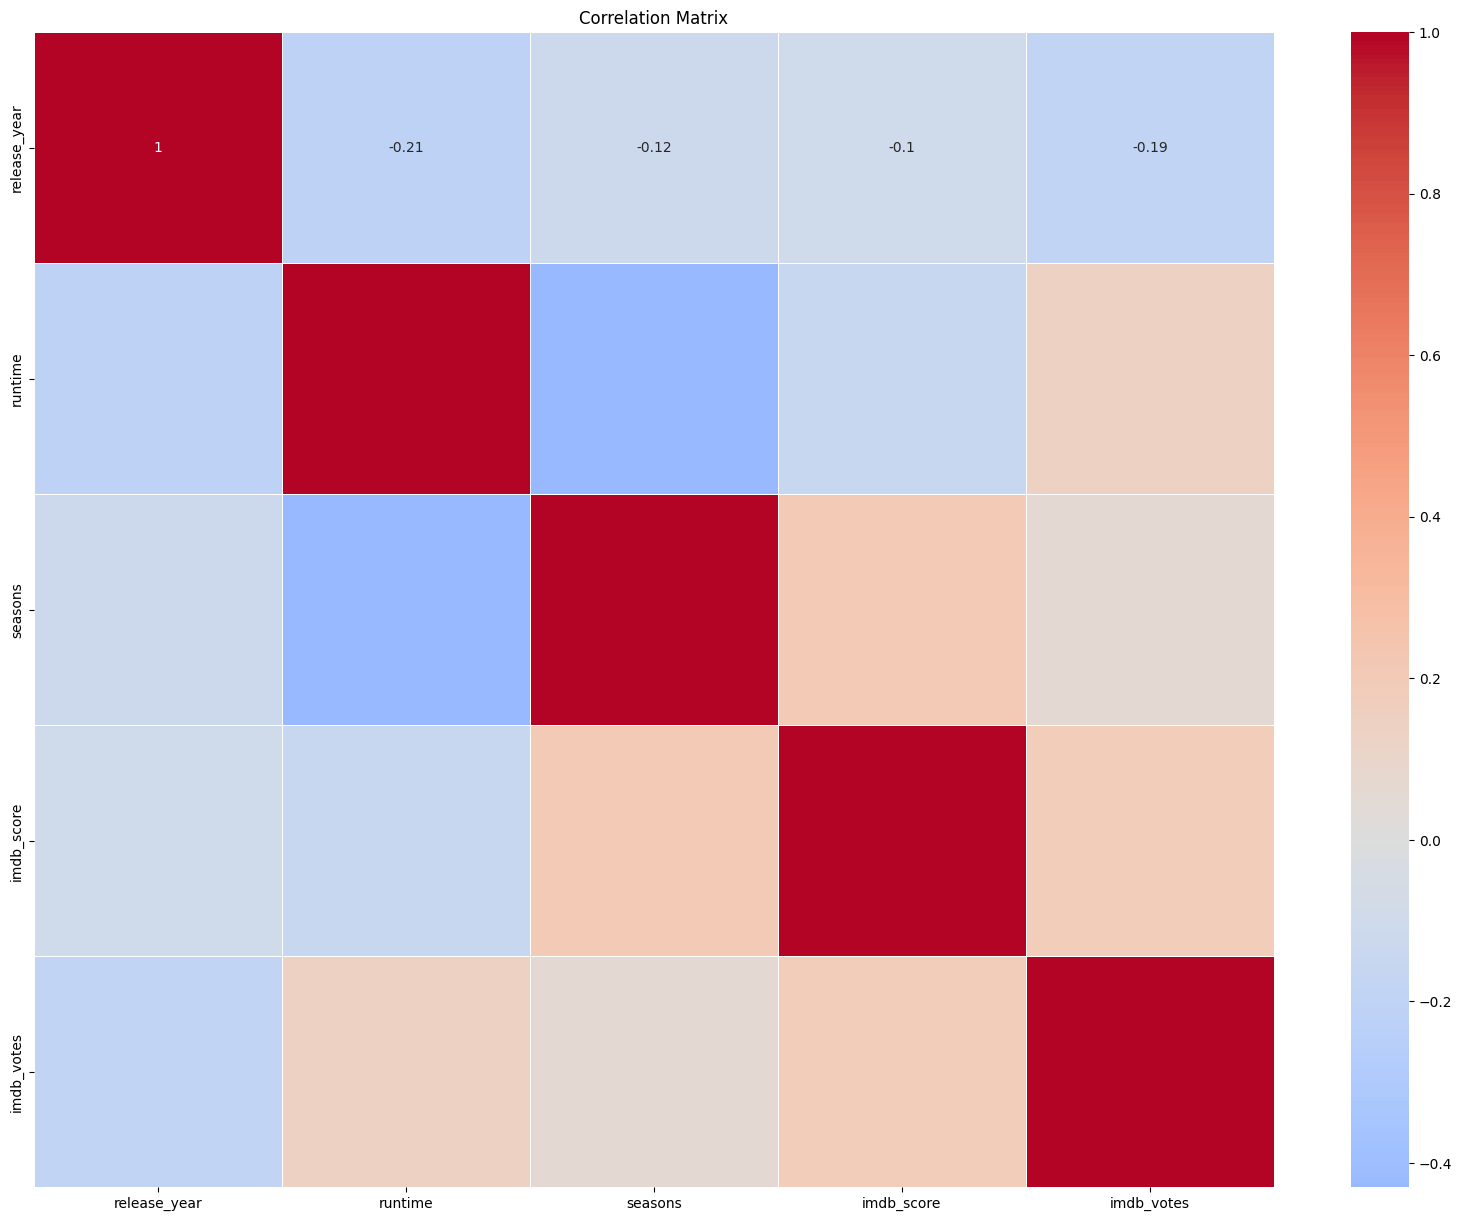

In [66]:
"""
Computing correlation matrix between numerical columns and plotting it 
for ease of visualization. Some columns are highly correlated with one another, 
which makes sense because a votes and ratings are associated.
"""
corr_matrix = raw_titles_df[numerical_cols].corr().round(2)

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


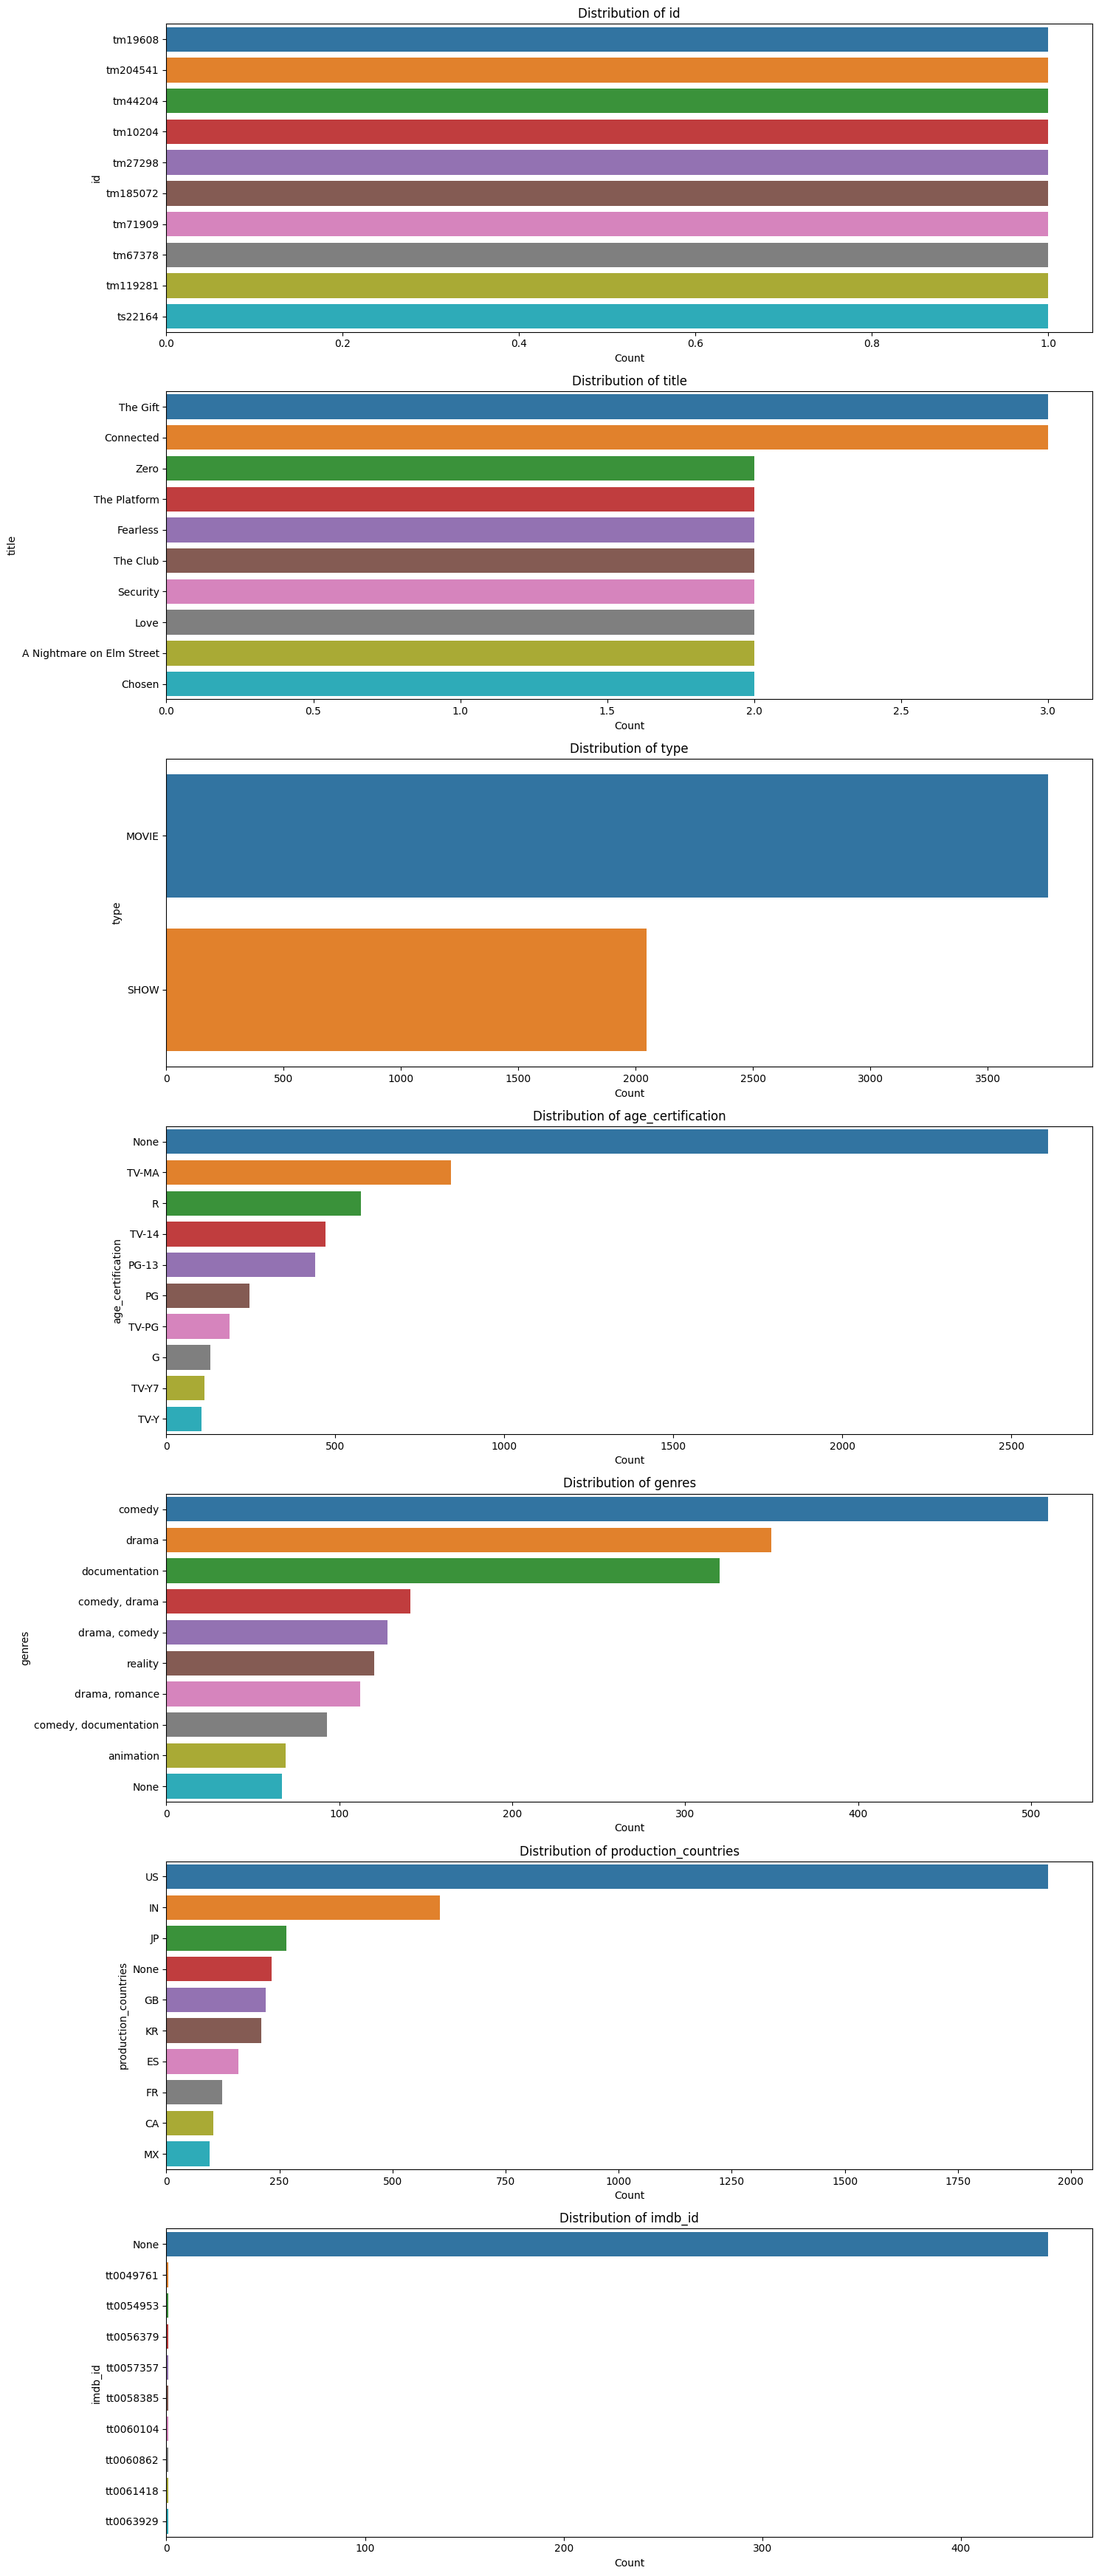

In [67]:
""" Plotting categorical Columns, first 10 values only."""
plt.figure(figsize=(15, 5 * len(categorical_cols)))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.countplot(data=raw_titles_df, y=col, order=raw_titles_df[col].value_counts().index[:10])
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

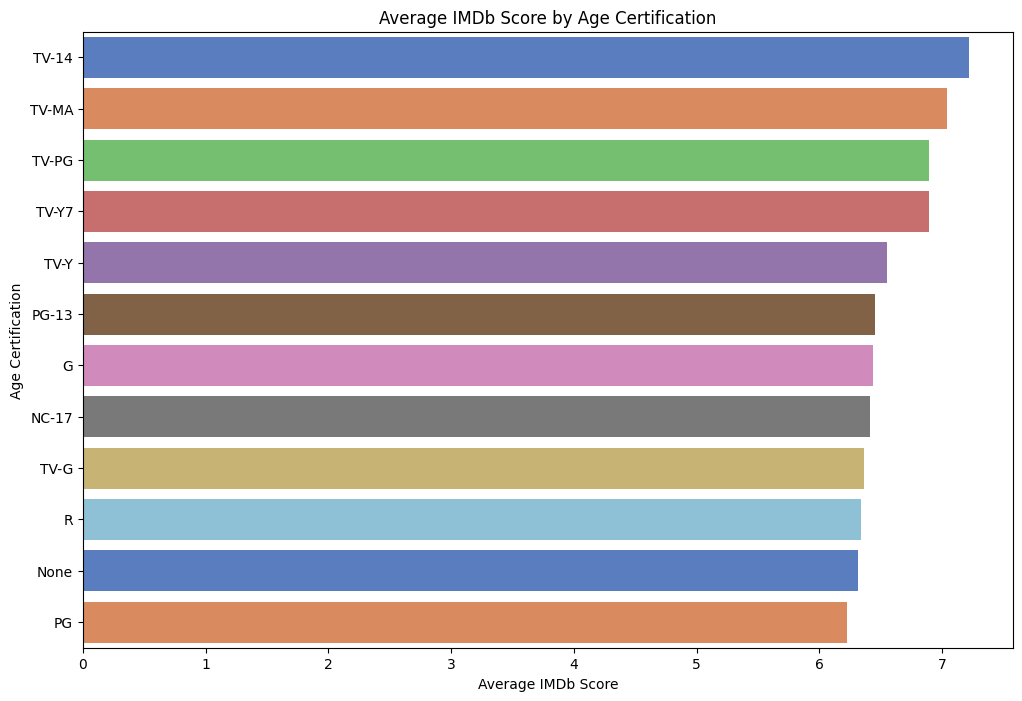

In [101]:
"""Average IMDb Score by Age Certification"""
plt.figure(figsize=(12, 8))
age_cert_scores = raw_titles_df.groupby('age_certification')['imdb_score'].mean().sort_values(ascending=False)
sns.barplot(y=age_cert_scores.index, x=age_cert_scores.values, palette="muted")
plt.title('Average IMDb Score by Age Certification')
plt.xlabel('Average IMDb Score')
plt.ylabel('Age Certification')
plt.show()

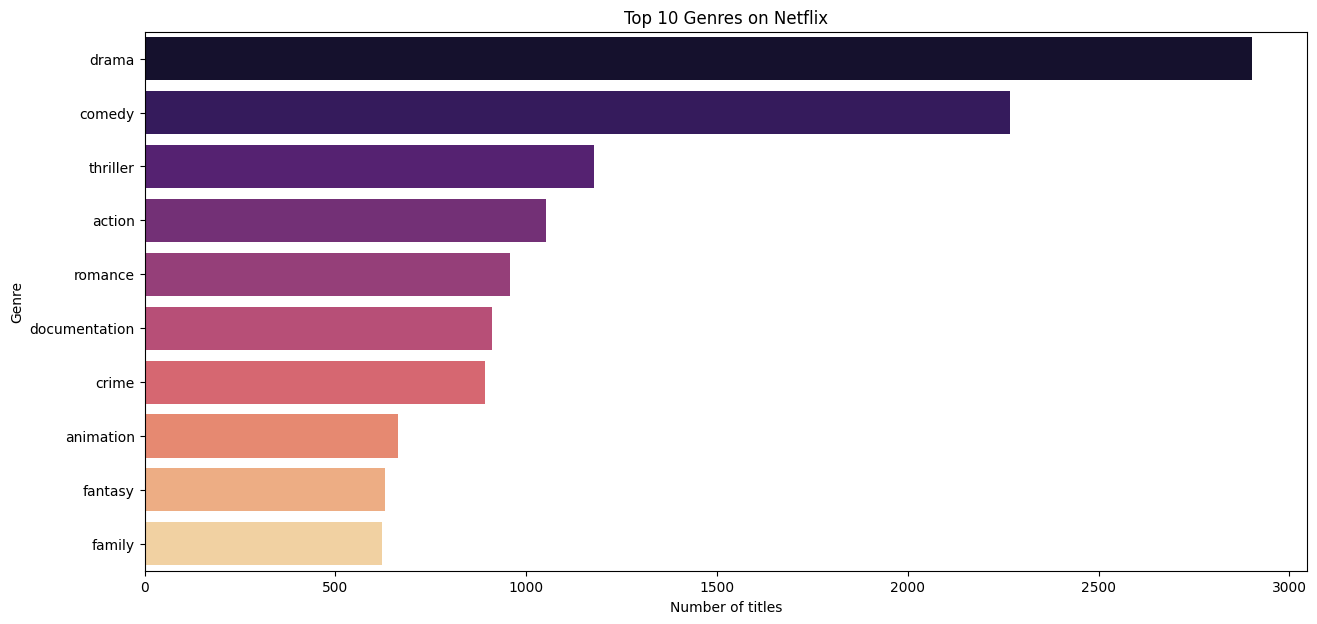

In [68]:
"""Genres by number of titles, genres unnrested."""
all_genres = raw_titles_df['genres'].dropna().str.split(", ").sum()
genre_counts = pd.Series(all_genres).value_counts()

plt.figure(figsize=(15, 7))
sns.barplot(y=genre_counts.index[:10], x=genre_counts.values[:10], palette='magma')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of titles')
plt.ylabel('Genre')
plt.show()


In [94]:
"""Genres by IMDB Score and Votes"""
exploded_df = raw_titles_df.copy()
exploded_df['genres'] = exploded_df['genres'].str.split(', ')
exploded_df = exploded_df.explode('genres')

score_genre = exploded_df.groupby('genres')[['imdb_score','imdb_votes']].mean().reset_index()

score_genre_sorted = score_genre.sort_values(by=['imdb_score'], ascending = False)
vote_genre_sorted = score_genre.sort_values(by=['imdb_votes'], ascending = False)
score_genre_sorted.head()

,genres,imdb_score,imdb_votes
10,history,7.149785,28691.403433
18,war,7.075168,53059.530201
5,documentation,6.996593,5531.207692
2,animation,6.719699,12611.530827
16,sport,6.710843,25305.403614


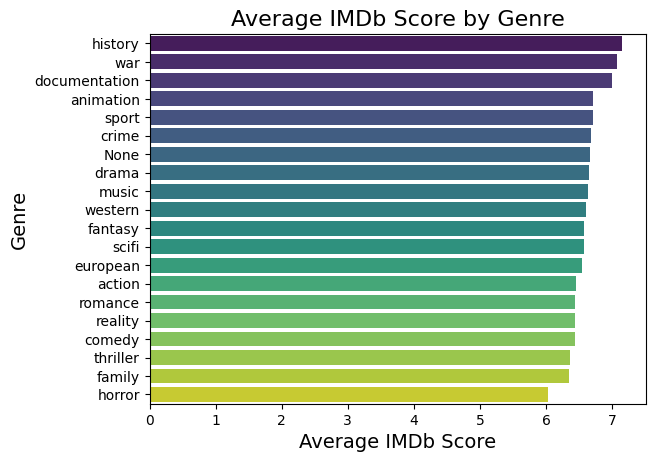

In [95]:
"""Barplot for genres by IMDb score"""
sns.barplot(x='imdb_score', y='genres', data=score_genre_sorted, palette='viridis')
plt.title('Average IMDb Score by Genre', fontsize=16)
plt.xlabel('Average IMDb Score', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.show()

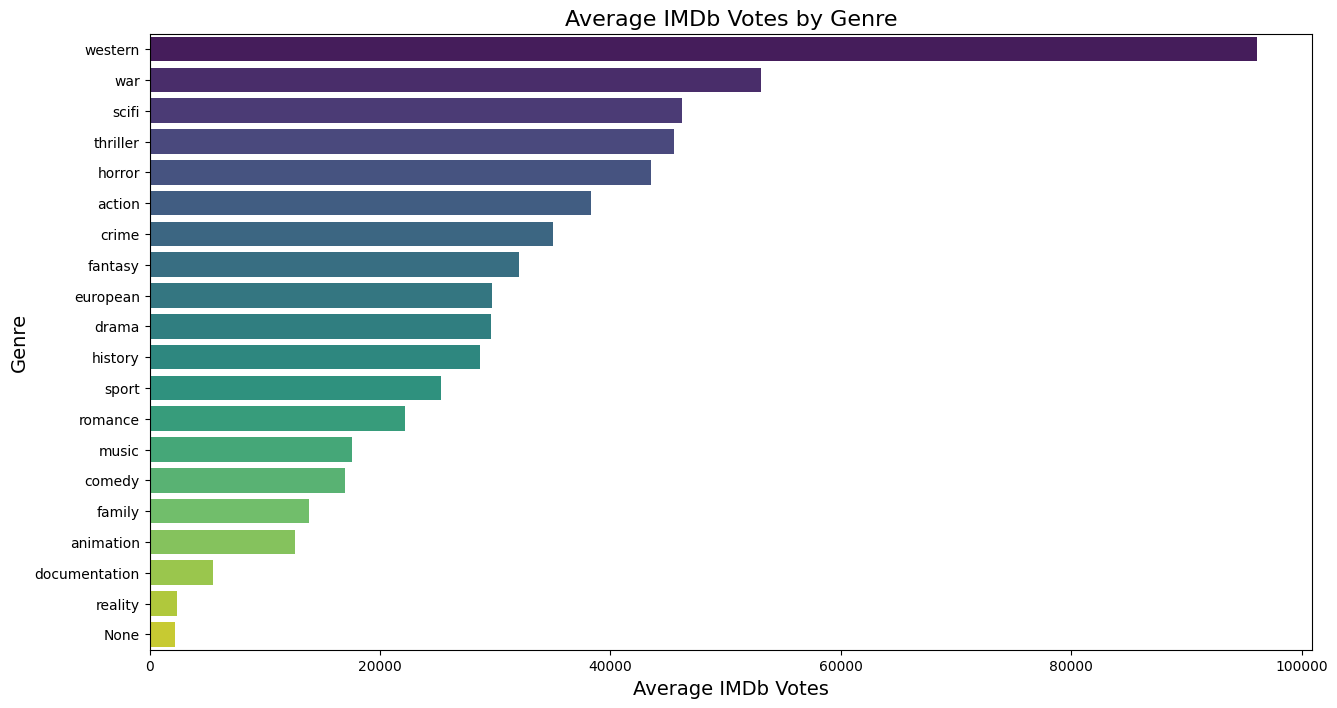

In [96]:
"""Create a barplot for genres by IMDb votes"""
plt.figure(figsize=(15, 8))
sns.barplot(x='imdb_votes', y='genres', data=vote_genre_sorted, palette='viridis')
plt.title('Average IMDb Votes by Genre', fontsize=16)
plt.xlabel('Average IMDb Votes', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.show()


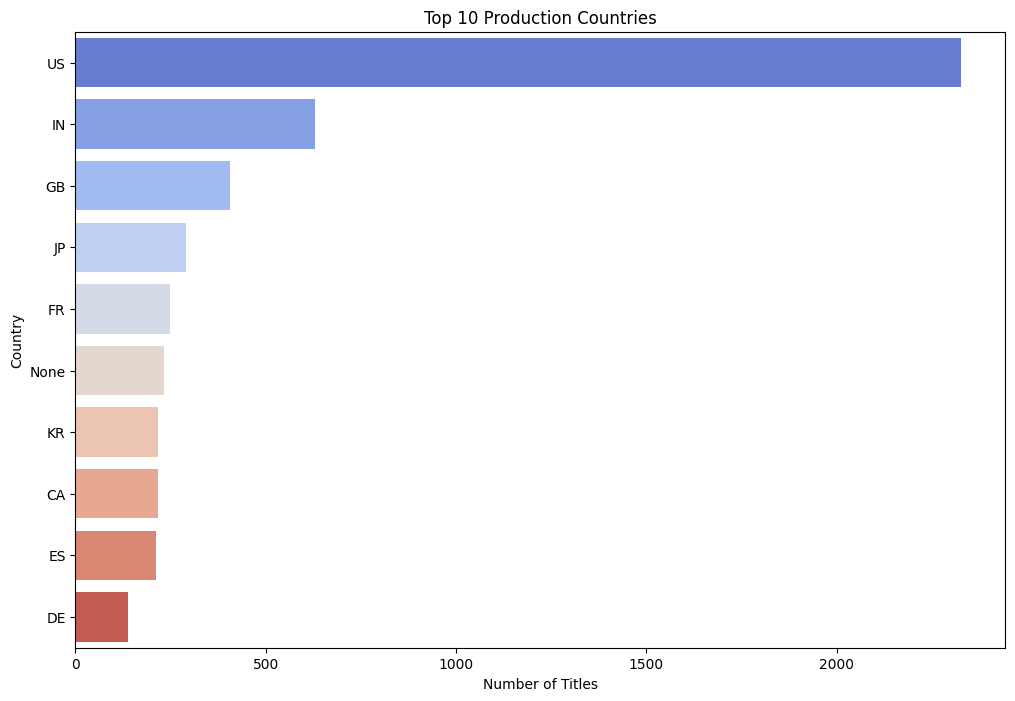

In [ ]:
"""Production countries unnested."""
all_countries = raw_titles_df['production_countries'].str.split(', ').sum()

country_counts = pd.Series(all_countries).value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(y=country_counts.index, x=country_counts.values, palette="coolwarm")
plt.title('Top 10 Production Countries')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

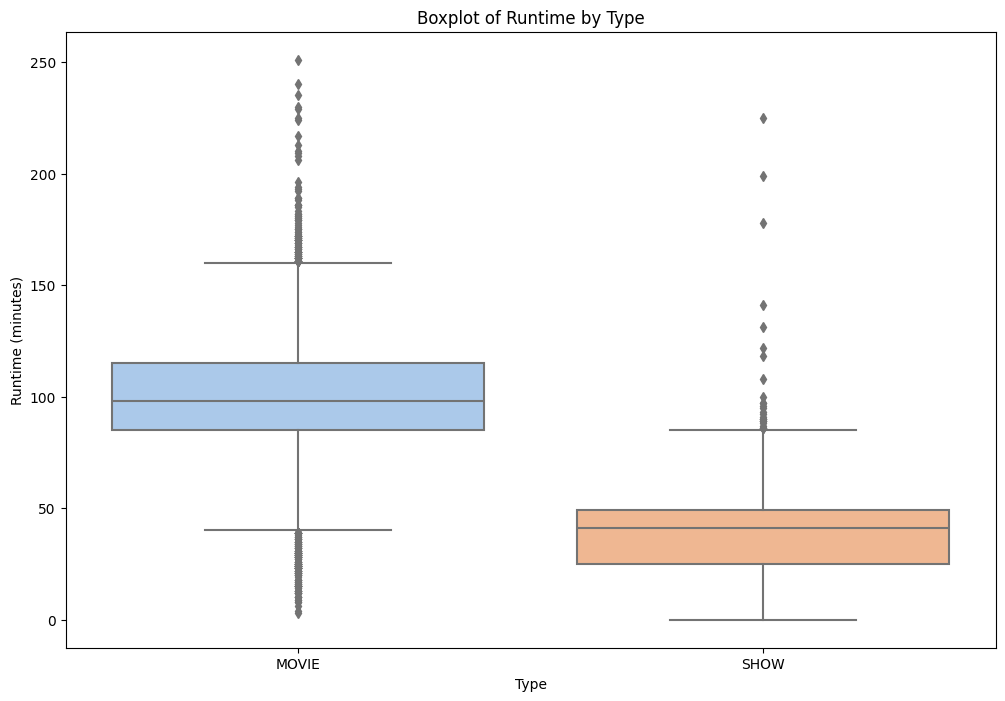

In [ ]:
# Runtime distribution by title type
plt.figure(figsize=(12, 8))
sns.boxplot(x="type", y="runtime", data=raw_titles_df, palette="pastel")
plt.title('Boxplot of Runtime by Type')
plt.xlabel('Type')
plt.ylabel('Runtime (minutes)')
plt.show()

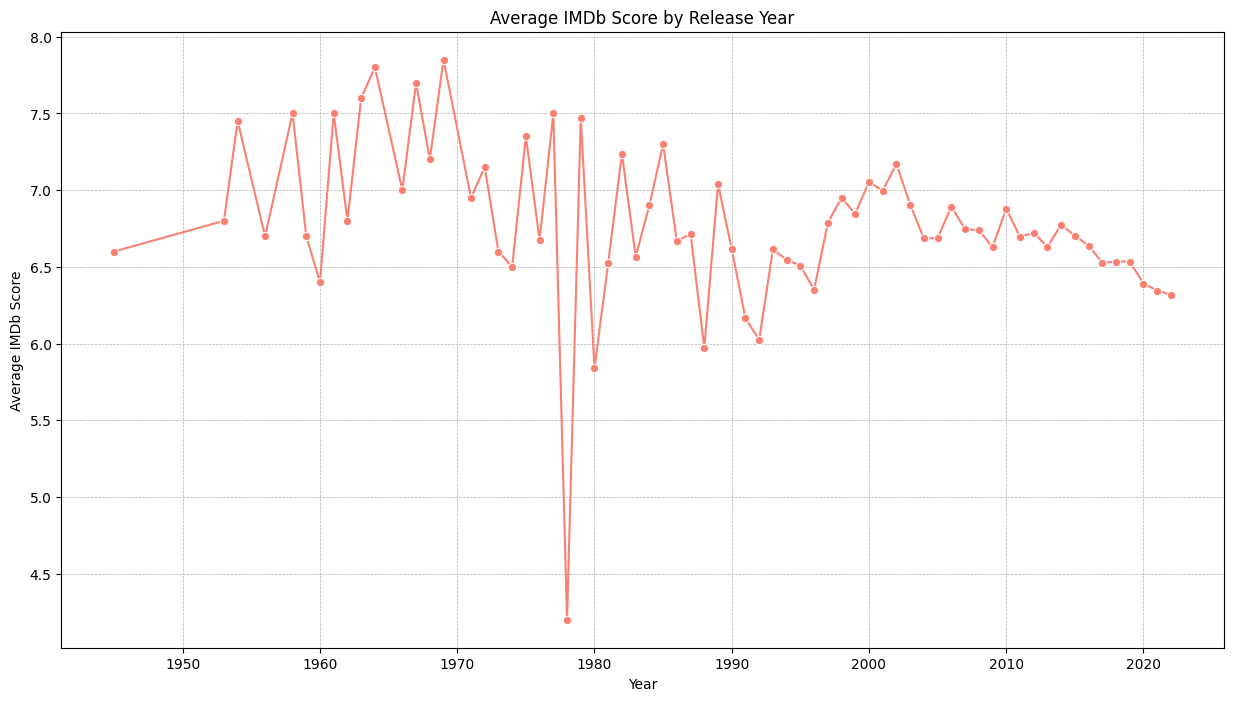

In [ ]:
"""Average IMDb Score by Release Year"""
plt.figure(figsize=(15, 8))
yearly_avg_score = raw_titles_df.groupby('release_year')['imdb_score'].mean()
sns.lineplot(x=yearly_avg_score.index, y=yearly_avg_score.values, marker="o", color="salmon")
plt.title('Average IMDb Score by Release Year')
plt.xlabel('Year')
plt.ylabel('Average IMDb Score')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


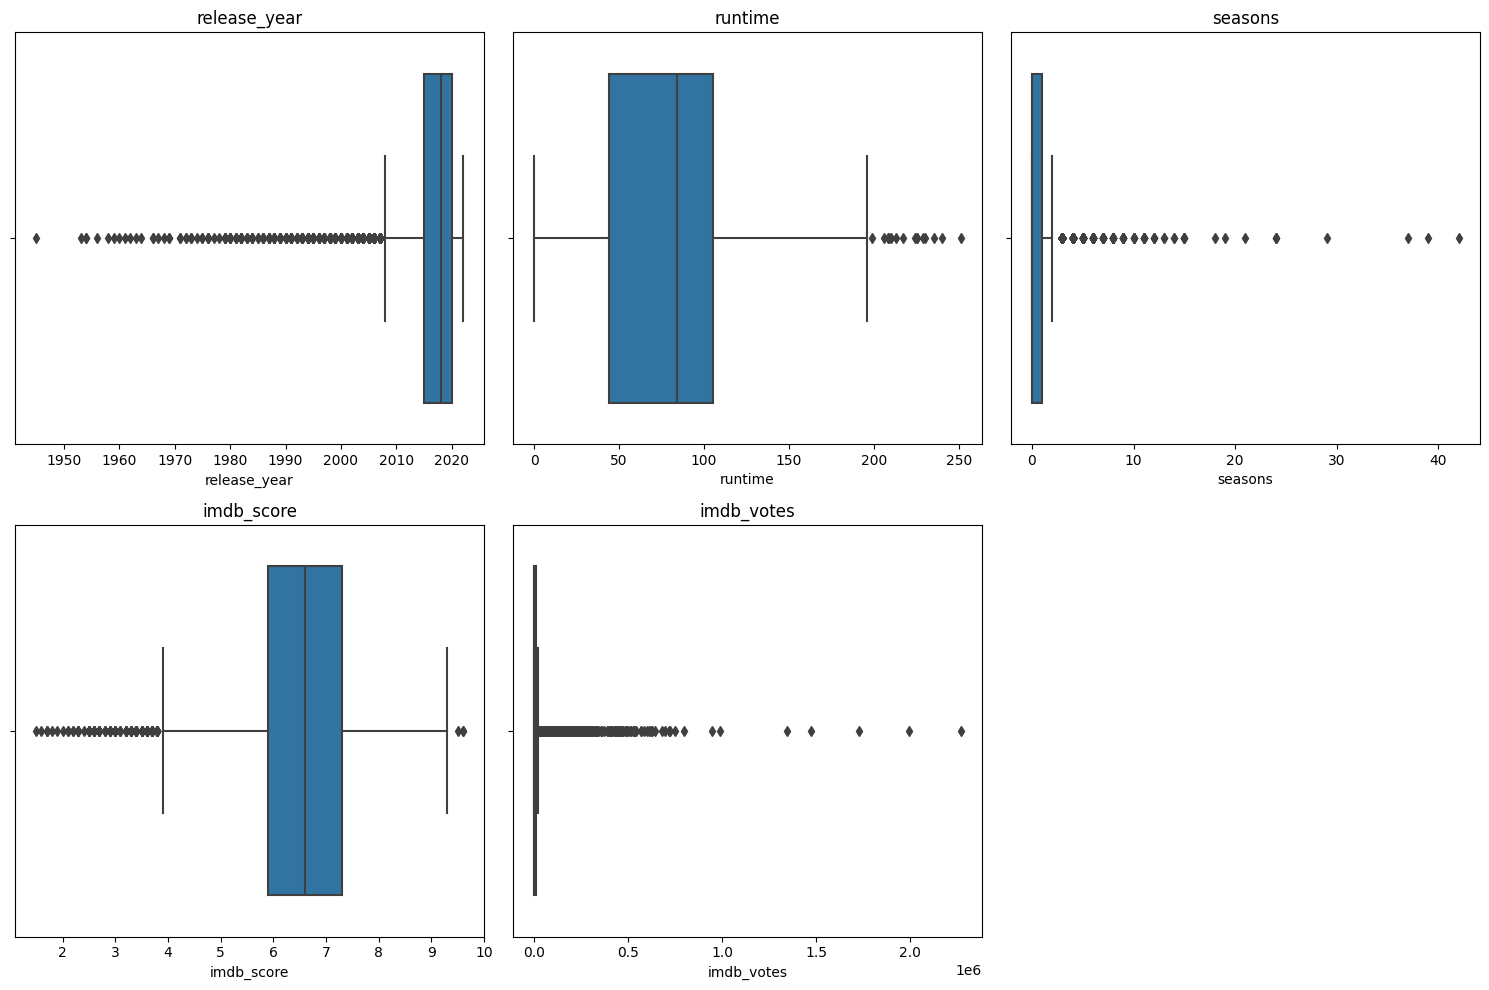

In [69]:
"""Graphical investigation of numerical columns for outliers."""
outliers_numerical_cols(raw_titles_df)

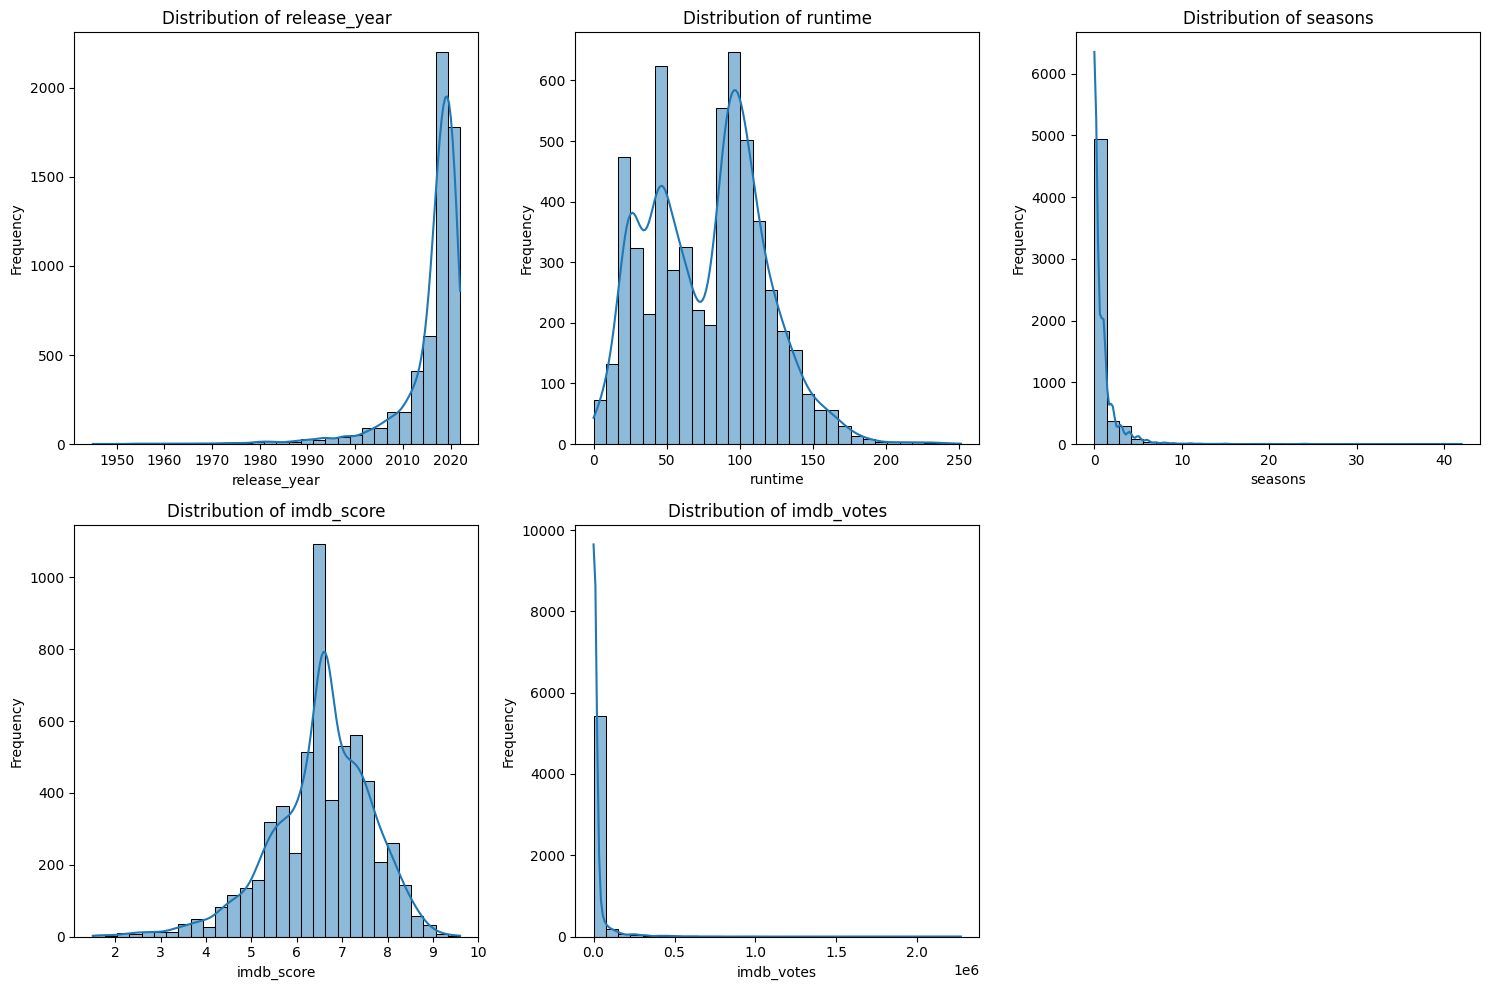

In [70]:
"""View distribution of numerical columns."""
distribution_numerical_cols(raw_titles_df)

## raw credits

In [83]:
data = pd.read_csv("raw_credits_df.csv")
raw_credits_df = pd.DataFrame(data)

In [84]:
compute_missing_values(raw_credits_df)

,Missing Values,Percentage (%)
character,9627,12.47


In [85]:
raw_credits_df['character'].fillna("None", inplace=True)

In [86]:
"""Create analyses dictionary to view for cateogrical columns. """
analysis_results_dict = {}
non_str_columns = []

for column in raw_credits_df.columns:
    try:
        results, shortest, longest = analyze_categorical_column(raw_credits_df, column)
        analysis_results_dict[column] = {
            "analysis_results": results,
            "shortest_value": shortest,
            "longest_value": longest
        }
    except Exception as e:
        non_str_columns.append(column)

non_str_columns

['person_id']

In [87]:
new_col = 'character'
analysis_results_dict[new_col]['analysis_results']

{'missing_values': 0,
 'unique_values': 47126,
 'total_values': 77213,
 'duplicated_values': 30087,
 'values_with_whitespace': 1,
 'values_with_unusual_chars': 2132,
 'shortest_value_length': 1,
 'longest_value_length': 298,
 'average_value_length': 11.377954489528966}

In [88]:
new_col = 'name'
analysis_results_dict[new_col]['analysis_results']

{'missing_values': 0,
 'unique_values': 53687,
 'total_values': 77213,
 'duplicated_values': 23526,
 'values_with_whitespace': 13,
 'values_with_unusual_chars': 4709,
 'shortest_value_length': 1,
 'longest_value_length': 73,
 'average_value_length': 13.3068265706552}

In [89]:
new_col = 'role'
analysis_results_dict[new_col]['analysis_results']

{'missing_values': 0,
 'unique_values': 2,
 'total_values': 77213,
 'duplicated_values': 77211,
 'values_with_whitespace': 0,
 'values_with_unusual_chars': 0,
 'shortest_value_length': 5,
 'longest_value_length': 8,
 'average_value_length': 5.17573465608123}

In [90]:
numerical_cols = raw_credits_df.select_dtypes(include=['float', 'int']).columns.tolist()
categorical_cols = raw_credits_df.select_dtypes(include=['string', 'object']).columns.tolist()
numerical_cols, categorical_cols

(['person_id'], ['id', 'name', 'character', 'role'])

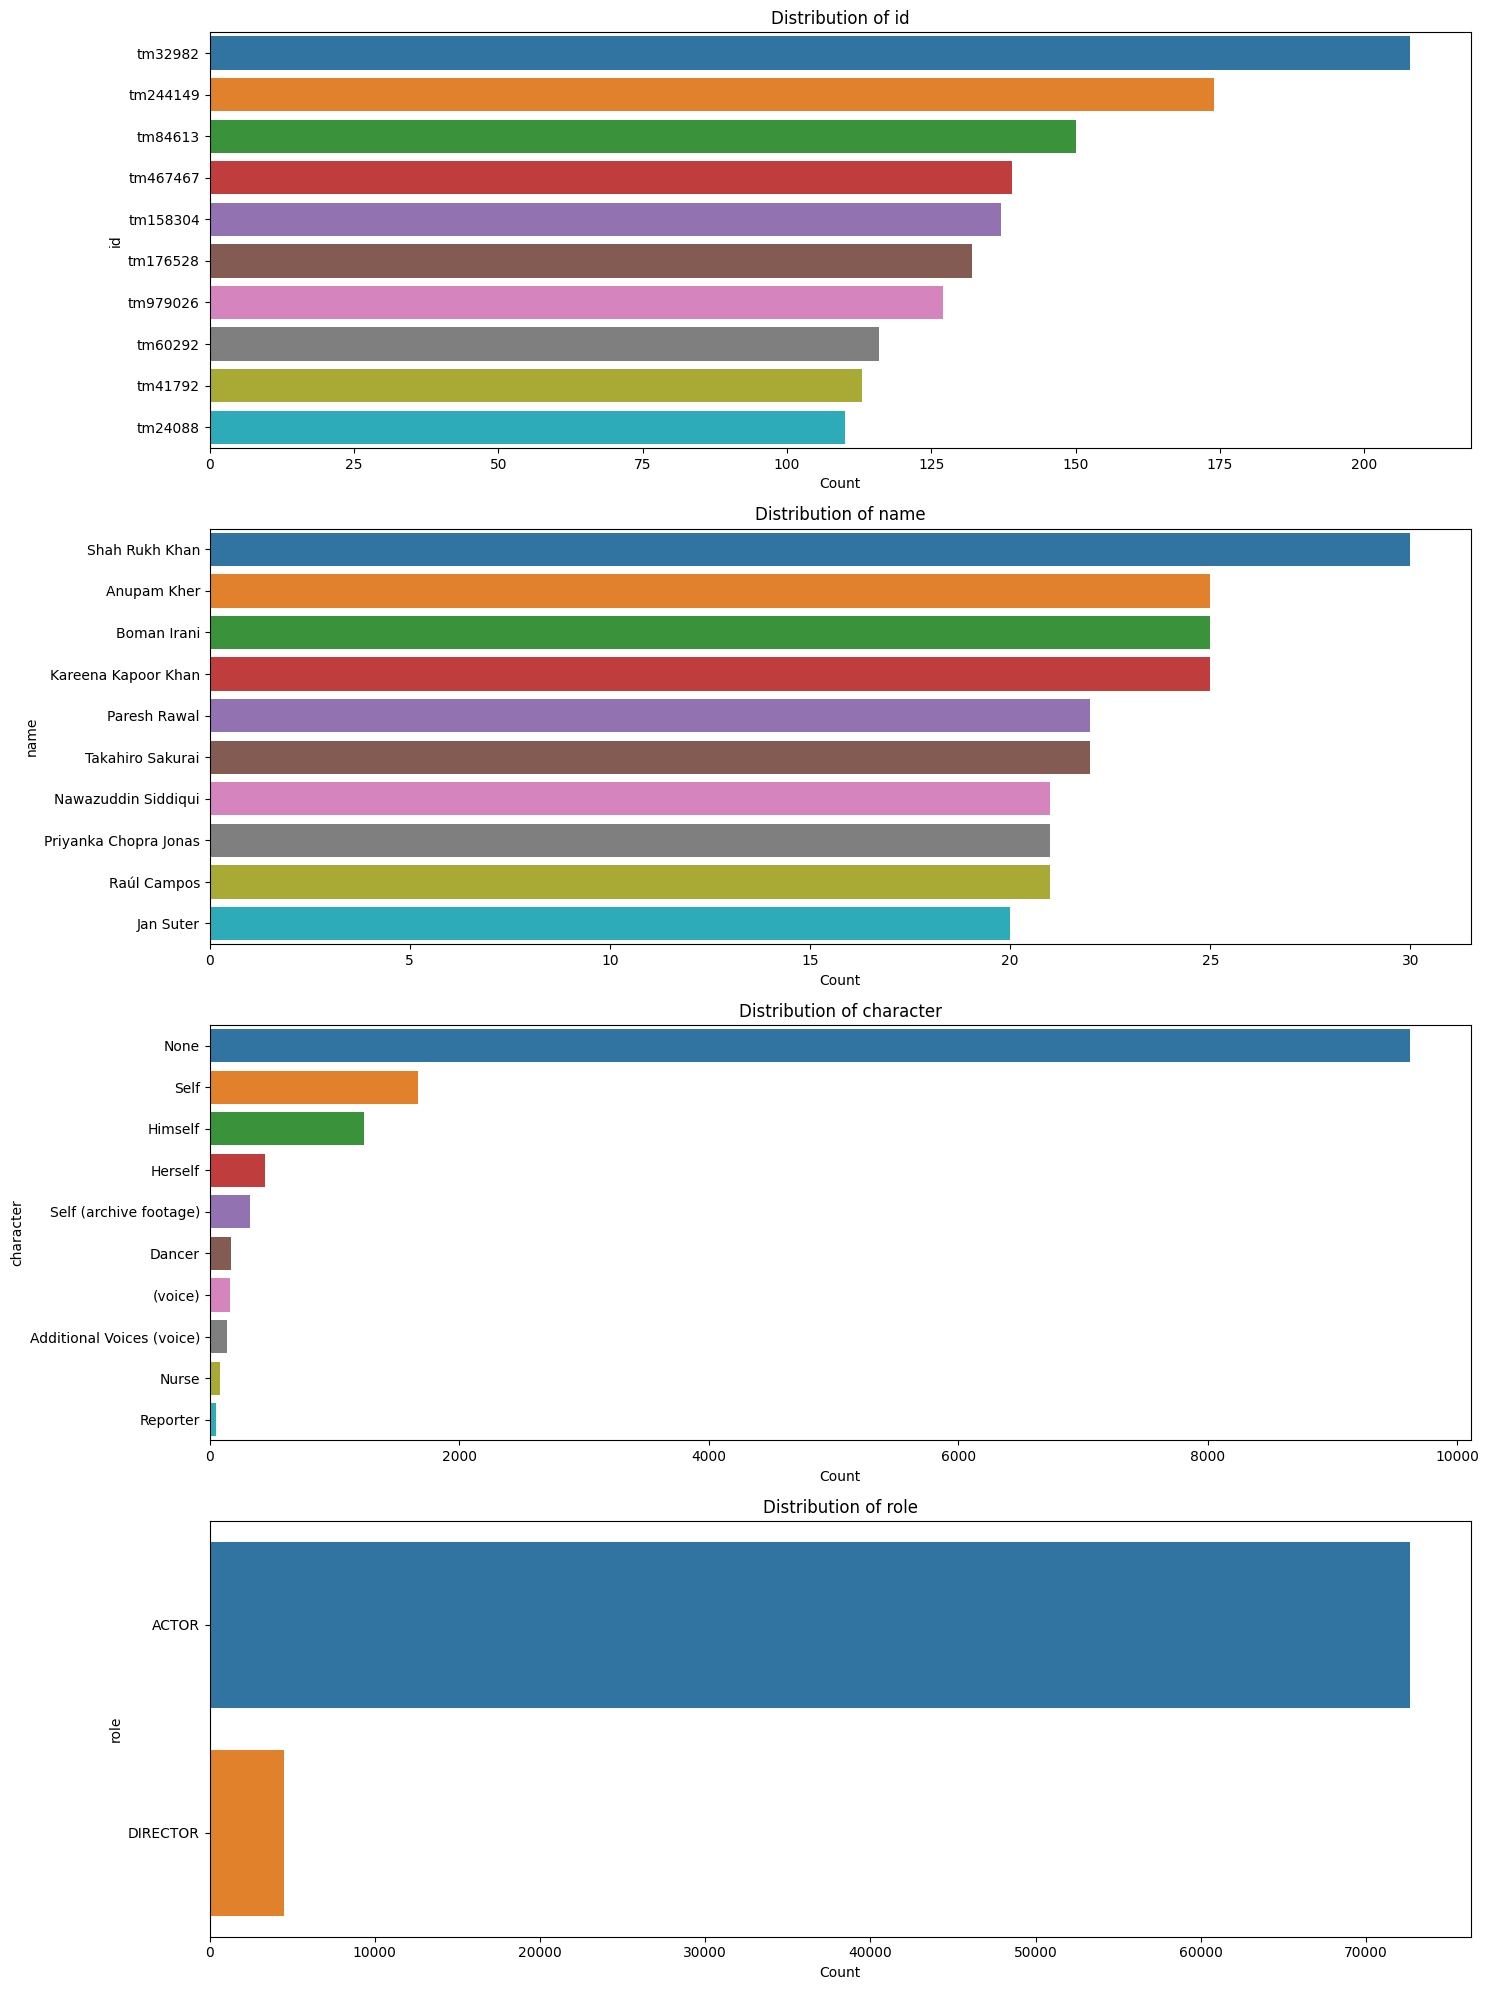

In [91]:
""" Plotting categorical Columns, first 10 values only."""
plt.figure(figsize=(15, 5 * len(categorical_cols)))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.countplot(data=raw_credits_df, y=col, order=raw_credits_df[col].value_counts().index[:10])
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Additional Analyses

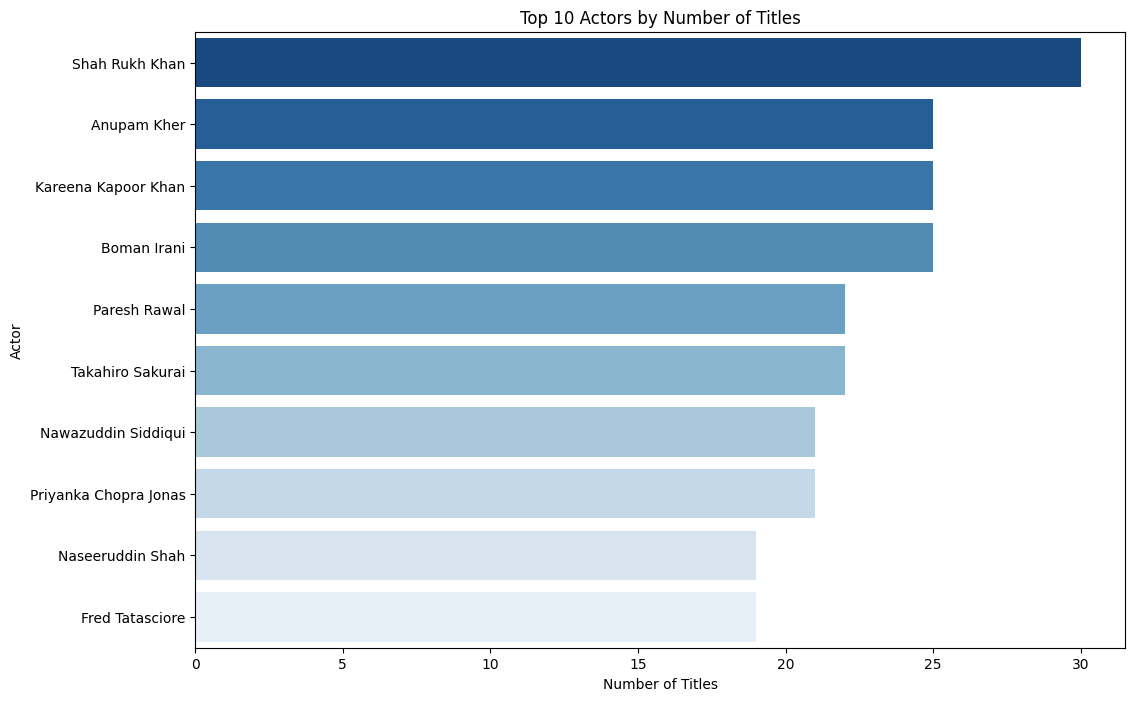

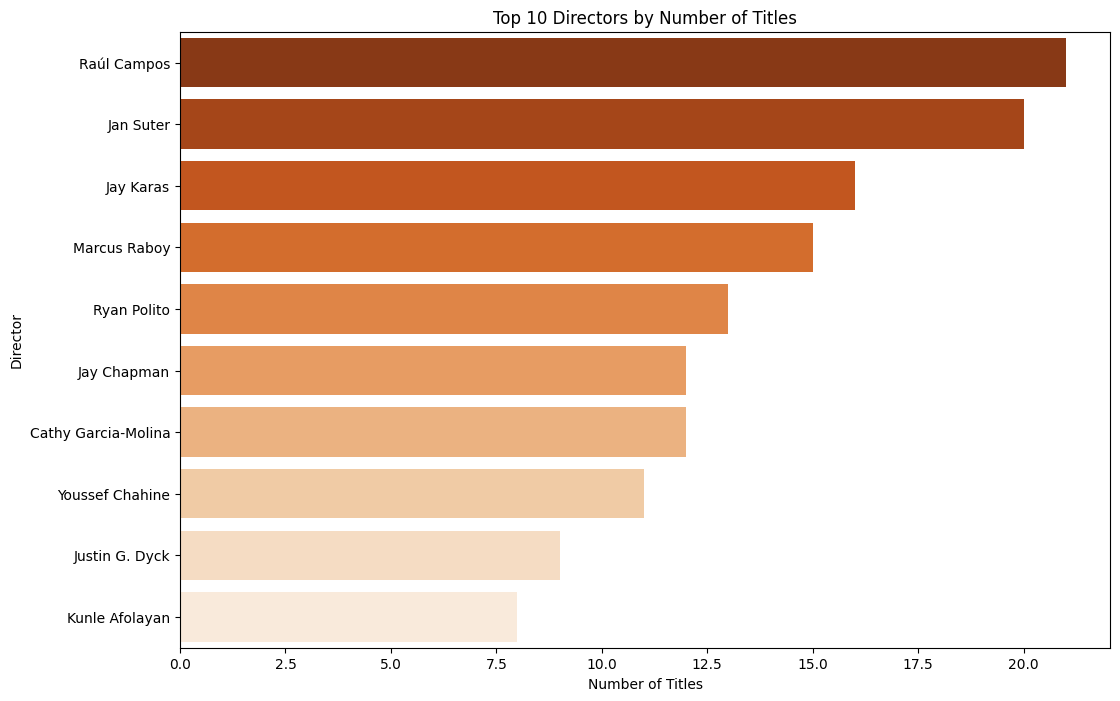

In [78]:
"""Top Actors and Directors"""
actors_df = raw_credits_df[raw_credits_df['role'] == 'Actor']
directors_df = raw_credits_df[raw_credits_df['role'] == 'Director']

top_actors = raw_credits_df[raw_credits_df['role'] == 'ACTOR']['name'].value_counts().head(10)
top_directors = raw_credits_df[raw_credits_df['role'] == 'DIRECTOR']['name'].value_counts().head(10)

# Plotting top 10 actors
plt.figure(figsize=(12, 8))
sns.barplot(y=top_actors.index, x=top_actors.values, palette="Blues_r")
plt.title('Top 10 Actors by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.show()

# Plotting top 10 directors
plt.figure(figsize=(12, 8))
sns.barplot(y=top_directors.index, x=top_directors.values, palette="Oranges_r")
plt.title('Top 10 Directors by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


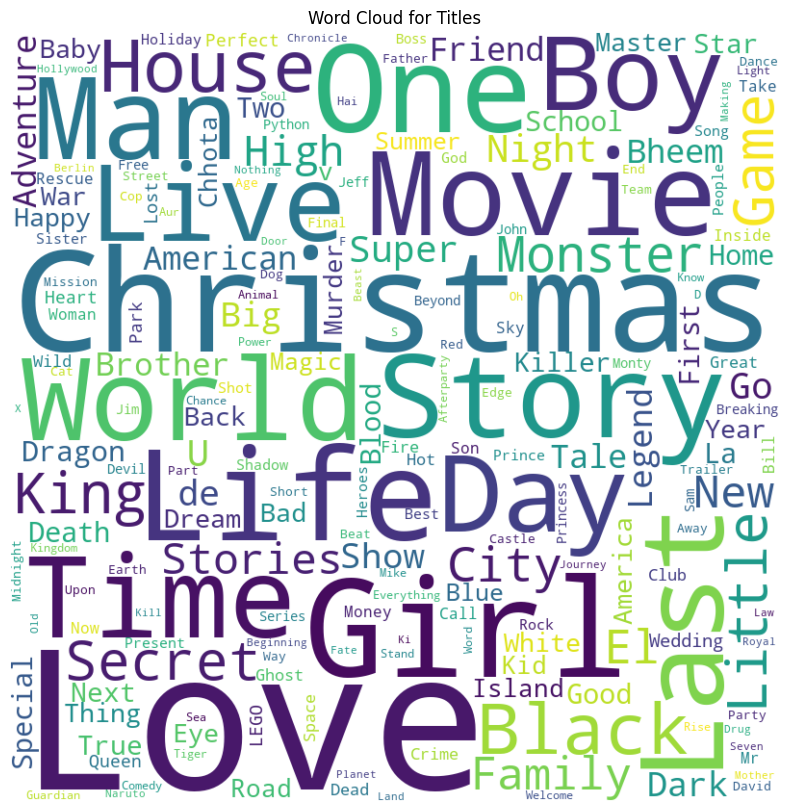

In [104]:
"""Generate the word cloud for title to see the most common themes."""
wordcloud = WordCloud(background_color="white", width=800, height=800, max_words=200, collocations=False).generate(" ".join(raw_titles_df['title']))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for Titles')
plt.show()
